<a href="https://colab.research.google.com/github/pixelatedAF/satellite-image-analysis/blob/main/Copy_of_CNN_Tree_Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/MyDrive/Satellite image processing/SatelliteTrees.zip" -d "/content/drive/MyDrive/DL Satellite/"

unzip:  cannot find or open /content/drive/MyDrive/Satellite image processing/SatelliteTrees.zip, /content/drive/MyDrive/Satellite image processing/SatelliteTrees.zip.zip or /content/drive/MyDrive/Satellite image processing/SatelliteTrees.zip.ZIP.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display Image
from PIL import Image
import cv2
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir("/content/drive/MyDrive/satellite/Trees in Satellite Imagery")

['NoTrees', 'Trees']

In [5]:
tree_image = Image.open("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees/Forest_1.jpg")
no_tree_image = Image.open("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/NoTrees/AnnualCrop_1.jpg")

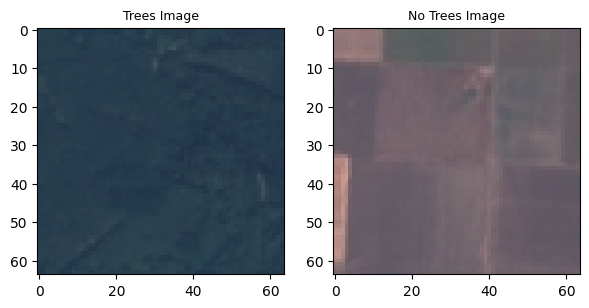

In [6]:
# Lets Plot two images using subplotting
fig = plt.figure(figsize = (7,5))
a1 = fig.add_subplot(1, 2, 1)
img_plot = plt.imshow(tree_image)
a1.set_title("Trees Image", fontsize = 9)
a1 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(no_tree_image)
a1.set_title("No Trees Image", fontsize = 9)
plt.show()

In [7]:
trees = os.listdir('/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees')
notrees = os.listdir('/content/drive/MyDrive/satellite/Trees in Satellite Imagery/NoTrees')

In [8]:
data = np.concatenate([trees, notrees])

In [9]:
data

array(['Forest_1892.jpg', 'Forest_1893.jpg', 'Forest_1894.jpg', ...,
       'AnnualCrop_1723.jpg', 'AnnualCrop_1719.jpg',
       'AnnualCrop_1725.jpg'], dtype='<U19')

In [10]:
len(data)

10400

In [11]:
target_yes = np.full(len(trees), 1)
target_no = np.full(len(notrees), 0)

In [12]:
data_target = np.concatenate([target_yes,target_no])
print(data_target)

[1 1 1 ... 0 0 0]


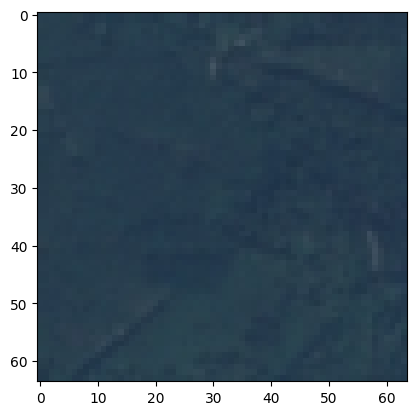

In [13]:
# Read Image Data using OpenCV [B,G,R]
img = cv2.imread("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees/Forest_1.jpg")
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img)

In [14]:
X_data = []
trees = os.listdir("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees")
for file in trees:
    img = cv2.imread(os.path.join("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees", file))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [15]:
notrees = os.listdir("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/NoTrees")
for file in notrees:
    img = cv2.imread(os.path.join("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/NoTrees",file))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [16]:
# All images as an Array
X = np.squeeze(X_data)
X.shape

(10400, 64, 64, 3)

##### Image Pixel Normalization

In [17]:
X = X.astype('float32')
X /= 255  # convert range of color from 0-255 to (0-1)
X[0]

array([[[0.13725491, 0.22745098, 0.25882354],
        [0.13725491, 0.22745098, 0.25882354],
        [0.14509805, 0.22352941, 0.26666668],
        ...,
        [0.14901961, 0.21960784, 0.25882354],
        [0.14901961, 0.22745098, 0.2627451 ],
        [0.14901961, 0.22745098, 0.2627451 ]],

       [[0.13725491, 0.22745098, 0.25882354],
        [0.13725491, 0.22745098, 0.25882354],
        [0.14509805, 0.22352941, 0.26666668],
        ...,
        [0.15294118, 0.22352941, 0.2627451 ],
        [0.14901961, 0.22745098, 0.2627451 ],
        [0.14901961, 0.22745098, 0.2627451 ]],

       [[0.14901961, 0.23921569, 0.2627451 ],
        [0.14901961, 0.23921569, 0.2627451 ],
        [0.14901961, 0.22745098, 0.2627451 ],
        ...,
        [0.14509805, 0.22352941, 0.26666668],
        [0.13333334, 0.21176471, 0.25490198],
        [0.14117648, 0.21960784, 0.2627451 ]],

       ...,

       [[0.11372549, 0.1882353 , 0.24313726],
        [0.10980392, 0.18431373, 0.23921569],
        [0.10588235, 0

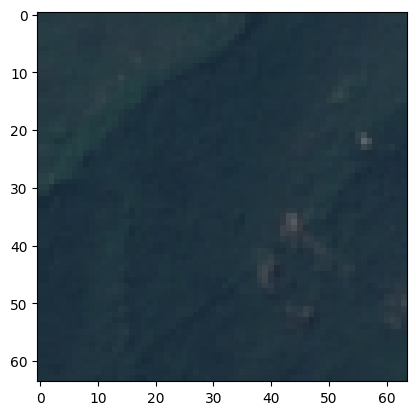

In [18]:
plt.imshow(X[0])

#### Split Data into Train & Test

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size = 0.15, random_state = 1)

In [20]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1)

In [21]:
print("Train sample shape: ", x_train2.shape)
print("Test sample shape: ", x_test.shape)
print("Validation sample shape: ", x_val.shape)

Train sample shape:  (7956, 64, 64, 3)
Test sample shape:  (1560, 64, 64, 3)
Validation sample shape:  (884, 64, 64, 3)


##### CNN Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [23]:
def build_model():
    model = Sequential()
    # Conv2D - Layer I, filters = 32, filter shape = (3,3), padding = zero padding, input shape = image shape
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same',
                     input_shape = (64,64,3)))
    model.add(MaxPooling2D(2,2))
    # Avoid Overfitting
    model.add(Dropout(0.2))
    # Layer - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    # Layer - III
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    # Flatten Layer
    model.add(Flatten())
    # Fully Connected Neural Network
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    # Learning Rate (alpha)
    adam_optimzer = Adam(learning_rate = 0.001)
    model.compile(optimizer = adam_optimzer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [24]:
model = build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,577 (16.36 MB)

 Trainable params: 4,288,577 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#from tensorflow.keras import callbacks
#filepath = "/content/drive/MyDrive/Best_Model.hdf5"
#checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', save_best_only = True, mode = 'min',verbose = 1)
#callbacks_list = [checkpoint]

In [27]:
# history = model.fit(x_train2, y_train2, epochs = 50, batch_size = 64, validation_data = (x_val, y_val), callbacks = callbacks_list)

In [28]:
# Transfer of knowledge
#model.load_weights('/content/drive/MyDrive/DL Satellite/Best_Model.hdf5')

In [29]:
model.evaluate(x_test, y_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4896 - loss: 0.6990


[0.6984737515449524, 0.5089743733406067]

In [30]:
# Predicted Outputs (as probability)
predictions = model.predict(x_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [31]:
print(predictions)

[[0.5179346 ]
 [0.5264726 ]
 [0.50924885]
 ...
 [0.50417566]
 [0.5093574 ]
 [0.523841  ]]


In [32]:
yhat = np.round(predictions)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[  1, 766],
       [  0, 793]])

<Axes: >

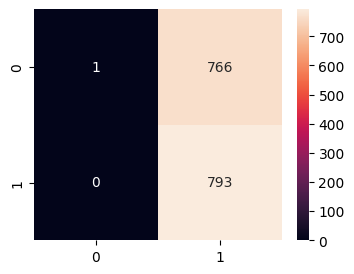

In [34]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt = '0.0f')

In [35]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       767
           1       0.51      1.00      0.67       793

    accuracy                           0.51      1560
   macro avg       0.75      0.50      0.34      1560
weighted avg       0.75      0.51      0.34      1560



#### Prediction of New Sample.

In [37]:
X_newdata = []
img_data = cv2.imread("/content/drive/MyDrive/satellite/Trees in Satellite Imagery/Trees/Forest_1051.jpg")
b, g, r = cv2.split(img_data)
img_data = cv2.merge([r, g, b])
X_newdata.append(img_data)

In [38]:
X_new = np.squeeze(X_newdata)
X_new = X_new.astype('float32')
X_new /= 255  # convert range of color from 0-255 to (0-1)

In [39]:
X_new = X_new.reshape(1, 64, 64, 3)

In [40]:
np.round(model.predict(X_new))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
#output 1-> trees
#       0->no trees